In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
X,y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


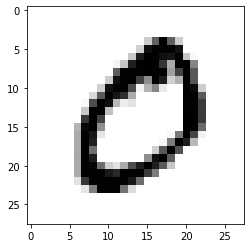

In [4]:
some_digit = X[1]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap='binary')
plt.show()

In [5]:
y[1]

'0'

In [6]:
y = y.astype(np.int8)

In [7]:
y[1] # Cast to number

0

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
y_test.shape

(10000,)

In [10]:
y_train_5 = (y_train ==5)
y_test_5 = (y_test == 5)

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state= 42)
sgd_clf.fit(X_train, y_train_5)

C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
np.sum(np.abs(sgd_clf.predict(X_train).astype('int') == 
              y_train_5.astype('int'))) / len(X_train)

0.9640666666666666

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state=42)
sgd_clf = SGDClassifier(random_state= 42, max_iter=1000, tol=1e-3)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    sgd_clf.fit(X_train_folds, y_train_folds)
    prediction = sgd_clf.predict(X_test_folds)
    print("Correct : {}".format(np.mean(prediction.astype('int') == \
                                y_test_folds.astype('int'))))

Correct : 0.9548
Correct : 0.9197
Correct : 0.96895


In [14]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring = 'accuracy')

array([0.96355, 0.93795, 0.95615])

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
y_train_prediction = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 4)

In [16]:
y_train_prediction

array([False, False, False, ...,  True, False, False])

In [17]:
confusion_matrix(y_train_5, y_train_prediction)
#confusion_matrix(y_train_prediction, y_train_5)

array([[54095,   484],
       [ 1917,  3504]], dtype=int64)

In [18]:
print(np.sum(y_train_5 == 0))
print(54095+484)

54579
54579


In [19]:
print(np.sum(y_train_5 == 1))
print(1917+3504)

5421
5421


In [20]:
print(np.sum(y_train_prediction == 0))
print(54095+1917)

56012
56012


In [21]:
print(np.sum(y_train_prediction == 1))
print(484+3504)

3988
3988


In [22]:
print(precision_score(y_train_5, y_train_prediction))
print(3504/ (484 + 3504))
print(recall_score(y_train_5, y_train_prediction))
print(3504/ (3504 + 1917))

0.8786359077231695
0.8786359077231695
0.6463752075262866
0.6463752075262866


In [23]:
y_scores = sgd_clf.decision_function(X_train[0:1])
print(y_scores)
threshold = 0
y_prediction = sgd_clf.predict(X_train[0:1])
print(y_prediction)
print(y_prediction > threshold)

[7740.39616553]
[ True]
[ True]


In [24]:
threshold = 8000
print(y_prediction > threshold)

[False]


In [25]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")
print(y_scores)

[ 15132.03909617 -18996.62507    -46067.2448135  ...   4194.41832838
  -6817.73418657 -14231.49763697]


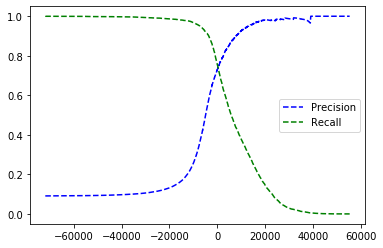

In [26]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g--', label='Recall')

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.legend()
plt.show()

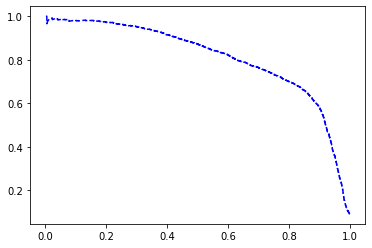

In [27]:
plt.plot(recalls, precisions, 'b--')

In [28]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.9)]

In [29]:
y_prediction_90 =  cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function") >= threshold_90_precision
print(precision_score(y_train_5, y_prediction_90))
print(recall_score(y_train_5, y_prediction_90))

0.9000380083618396
0.4368197749492714


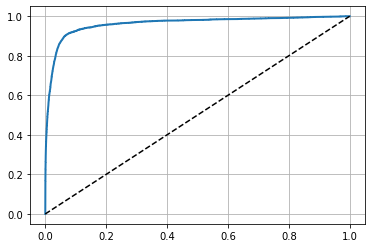

In [33]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)
def plot_roc_curve(fpr, tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2, label = label)
    plt.plot([0, 1], [0,1], 'k--')
    plt.grid()

plot_roc_curve(fpr, tpr)
plt.show()

In [34]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv = 5,
                                    method = 'predict_proba')

C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bptran\AppData\Local\Continuum\anaconda3\envs\rlcourse\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in vers

In [36]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

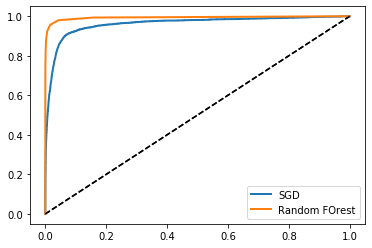

In [38]:
plot_roc_curve(fpr, tpr, label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, "Random FOrest")
plt.legend(loc="lower right")
plt.show()

In [42]:
forest_clf.fit(X_train, y_train_5)
y_train_prediction_rf = forest_clf.predict(X_train)
print(precision_score(y_train_5, y_train_prediction_rf))

1.0
